# Testing Dataloader

In [3]:
# connecting drive to colab notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import sys
sys.path.append('/content/drive/My Drive/drive_folder/')
from custom_dataset_loader import TaiChiDataset, ToTensor
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

In [2]:
TRAIN_DATA = "test_training_data"

In [ ]:
!unzip -d "$TRAIN_DATA"/ /content/drive/MyDrive/"$TRAIN_DATA".zip # unziping frames

In [3]:
# Load dataset
dataset = TaiChiDataset(log_file=TRAIN_DATA+'/content/training_data/sample_ids.txt',
                        root_dir=TRAIN_DATA+'/content/training_data/',
                        check=True,
                        transform=ToTensor()
                        )

print(dataset[0]['coords'].squeeze().shape) 

torch.Size([8, 10000, 2])


In [11]:
def show_image(img):
  if torch.is_tensor(img):
    img=img.permute(1, 2, 0).numpy()
  plt.imshow(img)
  plt.show()

# function to show dataset
def show_sample(sample):
  print("sample id:", sample['id'])
  show_image(sample['image0'])
  if len(sample)==4:
    show_image(sample['image1'])
  coords = sample['coords'].squeeze()[-1]
  plt.scatter(coords[:, 0], coords[:, 1], s=1, marker='.', c='r')
  plt.pause(0.001)  # pause a bit so that plots are updated

sample id: Wh3AmDsdQtM8


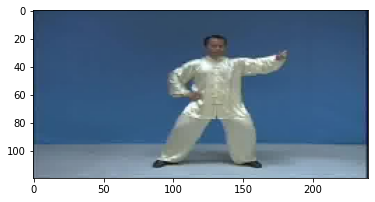

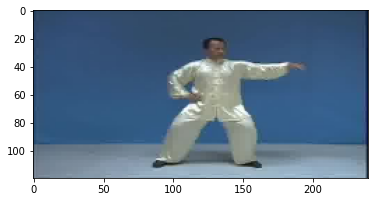

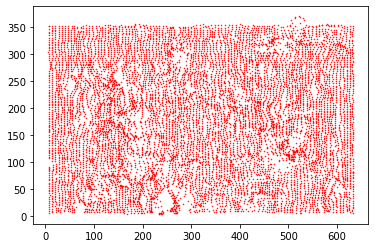

In [12]:
show_sample(dataset[1])

In [ ]:
# dataloader = DataLoader(dataset, batch_size=4, shuffle=True, num_workers=0)